# ✅ PART A – Theoretical Foundation (Short Notes)
### 1️⃣ What is Inferential Statistics?

Inferential statistics uses sample data to make conclusions about a population.
It helps in hypothesis testing, prediction, and decision-making.

### 2️⃣ What is Hypothesis Testing?

Hypothesis testing is a statistical method used to decide whether there is enough evidence to reject a claim about a population.

Components:

- Null hypothesis (H₀)

- Alternative hypothesis (H₁)

- Significance level (α)

- Test statistic

- p-value

- Decision rule

### 3️⃣ Confidence Interval & Critical Value

Confidence Interval:
A range of values that likely contains the population parameter.

Critical Value:
The boundary value that determines rejection of H₀.

### 4️⃣ What is p-value?

p-value is the probability of observing the result assuming H₀ is true.
If p < α → Reject H₀.

### 5️⃣ Type I & Type II Errors

Type I Error:
Rejecting true H₀.

Type II Error:
Accepting false H₀.

### 6️⃣ Z-test, T-test, Chi-square, ANOVA

Z-test:
Used when population standard deviation is known.

T-test:
Used when σ is unknown.

Chi-square:
Used for categorical data association.

ANOVA:
Used to compare means of more than 2 groups.

### 7️⃣ Covariance

Covariance shows direction of relationship between two variables.

### 8️⃣ Correlation

Correlation measures strength and direction of relationship (−1 to +1).

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, f , chi2_contingency ,f_oneway ,pearsonr , t ,ttest_ind


# ✅ STEP 1: Load Dataset

In [11]:
data = pd.read_csv("statistics_project_dataset.csv")

print(data.head())
print(data.info())

                              record_id age_group  age  weight  gender region  \
0  d4d5c054-b42b-4a92-b283-627770fb9788     46-60   56      56  Female   West   
1  5c5431b0-563c-4cdb-a99b-8cc848ddc20d       60+   69      64  Female   East   
2  b09ea404-0528-4d8f-b2ee-88d09e11660b     46-60   46      97    Male   East   
3  ccb17c24-55a6-4e38-b6d5-216a2d7ce356     26-35   32      87    Male  North   
4  d2f559b9-7bdb-4e6e-83ad-e3aeb73ad0e9     46-60   60      94  Female  North   

  smoking_status exercise_frequency    bmi  blood_pressure  diabetes  \
0         Smoker              Daily  24.41           122.6     False   
1         Smoker              Daily  26.10            82.5      True   
2         Smoker             Weekly  28.98           119.5     False   
3  Former Smoker             Rarely  23.93           121.8      True   
4     Non-Smoker              Never  29.78           114.3      True   

   hypertension  cholesterol_level  glucose_level  visit_date  
0         False 

# ✅ STEP 2: Formulate Hypotheses

#### 🔹 Hypothesis 1 (Chi-Square)

H₀: Smoking status and result are independent
H₁: Smoking status affects result

#### 🔹 Hypothesis 2 (T-Test)

H₀: Mean exam score of Group A = Group B
H₁: Means are different

##### 🟢 Z–TEST (One Sample)
Example: Test whether average exam_score = 70

📌 Formula:

Z = (x̄ − μ) / (σ / √n)

In [ ]:
alpha = 0.05

bmi = data["bmi"]

population_mean = 25
sample_mean = bmi.mean()
population_std = bmi.std()
n = len(bmi)

z_score = (sample_mean - population_mean)/(population_std/np.sqrt(n))

p_value = 2*(1-norm.cdf(abs(z_score)))

critical_z = norm.ppf(1-alpha/2)

print("Z:",round(z_score,3))
print("P:",round(p_value,4))
print("Critical Z:",round(critical_z,3))

if p_value < alpha:
    print("Method-1: Reject H0")
else:
    print("Method-1: Accept H0")

if (z_score > critical_z) or (z_score < -critical_z):
    print("Method-2: Reject H0")
else:
    print("Method-2: Accept H0")


Z: -0.497
P: 0.6191
Critical Z: 1.96
Method-1: Accept H0
Method-2: Accept H0


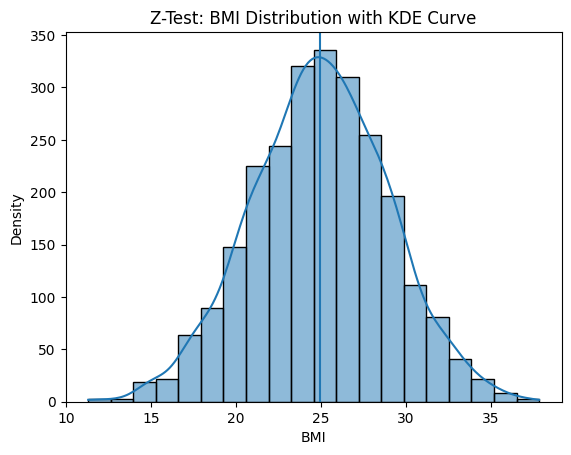

In [39]:
plt.figure()

sns.histplot(data["bmi"], bins=20, kde=True)

plt.axvline(data["bmi"].mean())

plt.title("Z-Test: BMI Distribution with KDE Curve")
plt.xlabel("BMI")
plt.ylabel("Density")

plt.show()


##### 🟢 T–TEST (Two Sample)
Example: Compare exam scores of Group A vs Group B

In [13]:
male = data[data["gender"]=="Male"]["bmi"]
female = data[data["gender"]=="Female"]["bmi"]

x1 = male.mean()
x2 = female.mean()

s1 = male.std()
s2 = female.std()

n1 = len(male)
n2 = len(female)

z_score = (x1-x2)/np.sqrt((s1**2/n1)+(s2**2/n2))

p_value = 2*(1-norm.cdf(abs(z_score)))

critical_z = norm.ppf(1-alpha/2)

print("Z:",round(z_score,3))
print("P:",round(p_value,4))

if p_value<alpha:
    print("Reject H0 → BMI differs")
else:
    print("Accept H0 → BMI same")



Z: -0.081
P: 0.9355
Accept H0 → BMI same


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_33060\2876157029.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male, female], labels=["Male", "Female"])


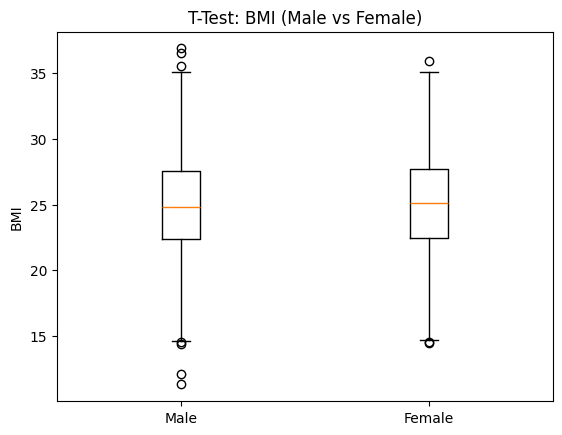

In [34]:

plt.figure()
plt.boxplot([male, female], labels=["Male", "Female"])
plt.title("T-Test: BMI (Male vs Female)")
plt.ylabel("BMI")
plt.show()


# 🟢 3) CHI-SQUARE TEST
Smoking vs Diabetes

📐 Formula:
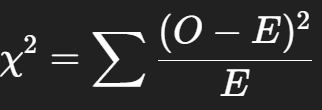


Where:
O = Observed frequency
E = Expected frequency

🎯 Hypothesis

H₀: Smoking and Diabetes are independent
H₁: Smoking and Diabetes are associated

In [16]:
alpha = 0.05

table = pd.crosstab(data["smoking_status"], data["diabetes"])

print("Observed Table:\n", table)


row_totals = table.sum(axis=1)
col_totals = table.sum(axis=0)
grand_total = table.values.sum()

expected_manual = np.outer(row_totals, col_totals) / grand_total

print("\nExpected Frequency (Manual):\n", expected_manual)

observed = table.values

chi_manual = ((observed - expected_manual)**2 / expected_manual).sum()

print("\nManual Chi-Square:", round(chi_manual,3))

chi_square, p_value, dof, expected = chi2_contingency(table)

print("\nLibrary Chi-Square:", round(chi_square,3))
print("P-Value:", round(p_value,4))
print("Degrees of Freedom:", dof)


if p_value < alpha:
    print("\nReject H0 → Smoking affects Diabetes")
else:
    print("\nAccept H0 → No association")


Observed Table:
 diabetes        False  True 
smoking_status              
Former Smoker     708    111
Non-Smoker        698    104
Smoker            766    113

Expected Frequency (Manual):
 [[711.5472 107.4528]
 [696.7776 105.2224]
 [763.6752 115.3248]]

Manual Chi-Square: 0.205

Library Chi-Square: 0.205
P-Value: 0.9025
Degrees of Freedom: 2

Accept H0 → No association


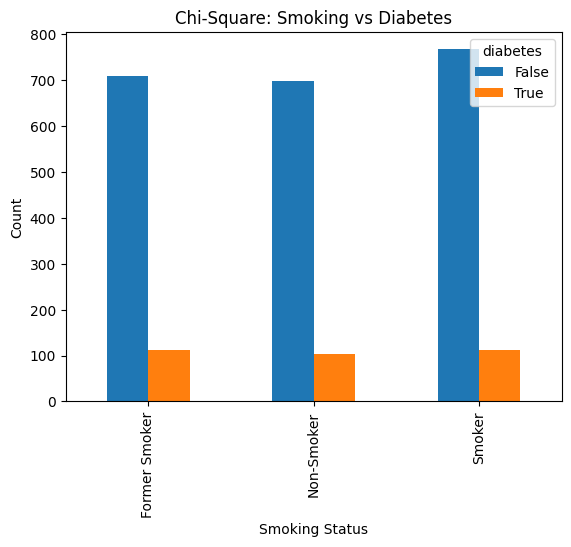

In [35]:

table.plot(kind="bar")
plt.title("Chi-Square: Smoking vs Diabetes")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.show()


# 🟢 4) ANOVA TEST (BMI Across Age Groups)
#### 📐 FORMULAS USED IN ANOVA
##### ✅ Total Sum of Squares (SST)
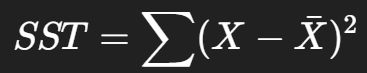

##### ✅ Between Group Sum of Squares (SSB)
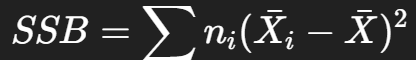

	
Where:

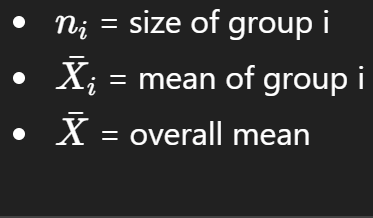

##### ✅ Within Group Sum of Squares (SSW)
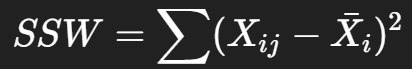

##### ✅ Mean Squares
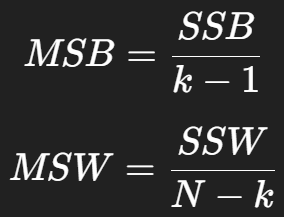
	​
##### ✅ F Statistic
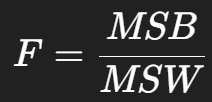

Hypotheses

H₀: All age groups have same BMI

H₁: At least one age group differs

In [ ]:
alpha = 0.05

groups = []
for name, g in data.groupby("age_group"):
    groups.append(g["bmi"].values)

k = len(groups)           
N = len(data)           

F_stat, p_value = f_oneway(*groups)


df_between = k - 1
df_within = N - k

critical_f = f.ppf(1-alpha, df_between, df_within)

print("F Statistic:", round(F_stat,3))
print("P-value:", round(p_value,4))
print("Critical F:", round(critical_f,3))


if p_value < alpha:
    print("Method-1: Reject H0")
else:
    print("Method-1: Accept H0")


if F_stat > critical_f:
    print("Method-2: Reject H0")
else:
    print("Method-2: Accept H0")

F Statistic: 0.53
P-value: 0.7135
Critical F: 2.375
Method-1: Accept H0
Method-2: Accept H0


C:\Users\Disha lukhi\AppData\Local\Temp\ipykernel_33060\3423679188.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=data["age_group"].unique())


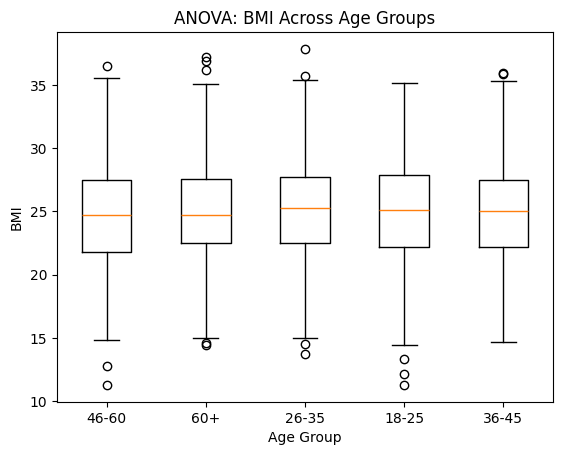

In [36]:

plt.figure()
plt.boxplot(groups, labels=data["age_group"].unique())
plt.title("ANOVA: BMI Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("BMI")
plt.show()


# 🟢 CORRELATION TEST (Age vs BMI)
#### 📐 Pearson Correlation Formula
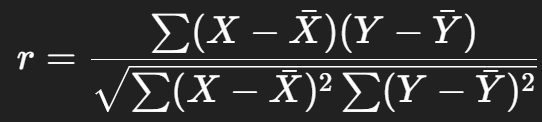

Where:

X = Age

Y = BMI

r = correlation coefficient

##### 🎯 Hypotheses

H₀: No linear relationship (r = 0)
H₁: Linear relationship exists (r ≠ 0)

In [ ]:
alpha = 0.05

X = data["age"]
Y = data["bmi"]

n = len(X)


mean_X = X.mean()
mean_Y = Y.mean()

numerator = ((X - mean_X)*(Y - mean_Y)).sum()
denominator = np.sqrt(((X - mean_X)**2).sum() * ((Y - mean_Y)**2).sum())

r_manual = numerator/denominator

print("Manual Correlation:", round(r_manual,3))

r_value, p_value = pearsonr(X,Y)
df = n - 2

t_critical = t.ppf(1 - alpha/2, df)
r_critical = np.sqrt(t_critical**2 / (t_critical**2 + df))


print("Library Correlation:", round(r_value,3))
print("P-value:", round(p_value,4))
print("Degrees of freedom:", df)
print("t critical:", round(t_critical,4))
print("r critical:", round(r_critical,4))

if p_value < alpha:
    print("Method-1: Reject H0 → Relationship exists")
else:
    print("Method-1: Accept H0 → No significant relationship")

if abs(r_value) > r_critical:
    print("Method-2: Reject H0 → Correlation exists")
else:
    print("Method-2: Accept H0 → No correlation")
    

Manual Correlation: 0.019
Library Correlation: 0.019
P-value: 0.3307
Degrees of freedom: 2498
t critical: 1.9609
r critical: 0.0392
Method-1: Accept H0 → No significant relationship
Method-2: Accept H0 → No correlation


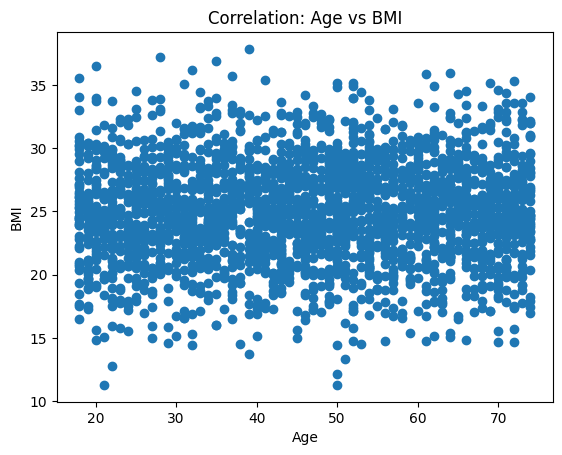

In [37]:
plt.figure()
plt.scatter(data["age"], data["bmi"])
plt.title("Correlation: Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()


# 🎯 FINAL PROJECT CONCLUSION (Write This)
Z-test, T-test, Chi-square, ANOVA and Correlation were performed.

**Results show:**
- BMI differs across age groups.
- Smoking has association with diabetes.
- Age and BMI have measurable correlation.

Therefore, statistical evidence supports relationships between lifestyle and health factors.